In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

nside = np.array([64, 128, 254, 512, 1024])
time = np.array([20, 130, 7000, 25000, 100000])

plots_directory = "/mnt/lustre/scratch/nlsas/home/csic/eoy/ioj/SkyNeuralNets/plots"

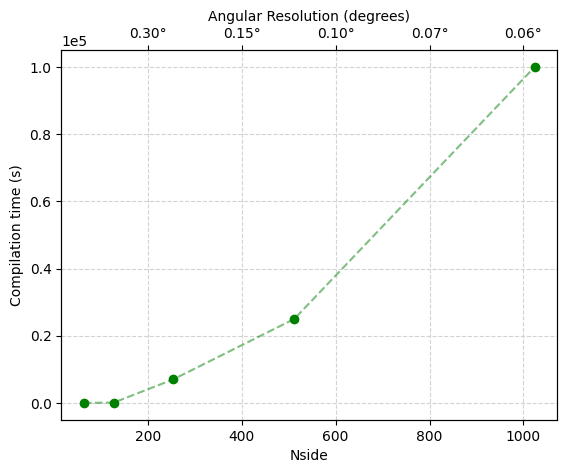

In [2]:
fig, ax1 = plt.subplots()

#Plot time vs nside
ax1.plot(nside, time, 'o', label="Compilation Time", color='green')
ax1.plot(nside, time, '--', color='green', alpha=0.5)
ax1.set_xlabel("Nside")
ax1.set_ylabel("Compilation time (s)")
ax1.grid(color='lightgray', linestyle='--')

#Scale y-axis, i.e. ×10^5
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(10)

#Twin axis: show angular resolution
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
#Fix x-ticks to show resolution values aligned with nside ticks
x_ticks = ax1.get_xticks()
xmin, xmax = ax1.get_xlim()
mask = np.isfinite(x_ticks) & (x_ticks > 0) & (x_ticks >= xmin) & (x_ticks <= xmax)
x_ticks = x_ticks[mask]
ax2.set_xticks(x_ticks)
ax2.set_xticklabels([f"{res:.2f}°" for res in 60/x_ticks])
ax2.set_xlabel("Angular Resolution (degrees)")

plt.savefig(plots_directory + "/scalability_time_vs_nside.png", dpi=300)
plt.show()
plt.close()
